<h3>1.Increased No of Epochs
  <br> 2. Inreased Batch size  and Learning rate</h3>

<h3>Import Libraries and modules</h3>

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add , BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


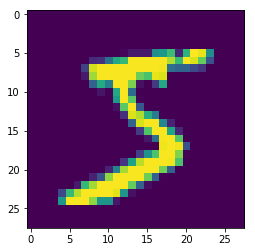

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:

from keras.layers import Activation
model1 = Sequential()


                                                                                  #input - conv - receptive feild
                                                                                  #input_conv|Receptive Field|output  

model1.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))      #28x28 |3x3|26x26
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Convolution2D(16, 3, 3, activation='relu'))                            #26x26 |5x5|24x24
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Convolution2D(16, 3, 3, activation='relu'))                            #24x24 |7x7|22x22
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(MaxPooling2D(pool_size=(2,2)))                                         #      |14x14|11x11    
model1.add(Convolution2D(10, 1, 1, activation='relu'))                                #11x11 |14x14|11x11 
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Convolution2D(16,3,3, activation='relu'))                              #11x11 |16x16|9x9 
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
model1.add(Convolution2D(16,3,3, activation='relu'))                              #9x9   |18x18|7x7 
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
#model1.add(Convolution2D(256,3,3,activation='relu'))                             
#model1.add(Convolution2D(512,3,3,activation='relu'))                             
#model1.add(Convolution2D(10,3,3,activation='relu'))                             
model1.add(Convolution2D(10, 1, activation='relu'))
model1.add(Convolution2D(10,7))                                                   #using kernel size 7 directly.  

model1.add(Flatten())
model1.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_25 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_25 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_26 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_26 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 22, 22, 16)        2320      
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model1.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.004), metrics=['accuracy'])

model1.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 9s 155us/step - loss: 0.1975 - acc: 0.9366 - val_loss: 0.0560 - val_acc: 0.9822
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0587 - acc: 0.9823 - val_loss: 0.0368 - val_acc: 0.9883
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0453 - acc: 0.9856 - val_loss: 0.0351 - val_acc: 0.9895
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 103us/step - loss: 0.0392 - acc: 0.9870 - val_loss: 0.0282 - val_acc: 0.9909
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [======

<h3>Conclusion</h3>

Achieved 99.41 Accuracy at 23rd epoch.

Drawback-:
Accuracy not consistent.

-------------------------------





In [0]:
score = model1.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.020518906447895644, 0.9931]


In [0]:
y_pred = model1.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.01038088e-13 1.67411657e-11 3.29837890e-09 1.58732352e-08
  2.26387546e-14 1.03558763e-12 5.95082377e-18 1.00000000e+00
  1.89548355e-13 7.92189780e-09]
 [7.25308036e-09 9.73269607e-07 9.99998927e-01 1.04415171e-10
  2.67111444e-10 1.77275589e-15 1.78039087e-07 5.85105011e-12
  8.69813643e-09 5.25459971e-12]
 [1.16043786e-10 9.99994993e-01 1.84171242e-07 2.29421193e-08
  1.88482022e-06 3.21451772e-08 2.19192682e-08 2.58668229e-06
  2.91813933e-08 1.91871578e-07]
 [9.99907970e-01 1.09631305e-15 5.43699805e-08 7.75671020e-12
  1.55854334e-08 1.59818159e-10 9.13815384e-05 1.21382182e-09
  6.53961862e-09 6.07154675e-07]
 [1.42035116e-11 1.99976091e-10 4.77963447e-09 1.84337485e-12
  9.99999523e-01 1.21737891e-16 7.13131550e-12 7.25984939e-10
  1.02805445e-10 4.80490883e-07]
 [1.52745139e-09 9.99975443e-01 4.68032886e-06 8.42725445e-09
  9.26446603e-07 2.23717378e-09 1.33338602e-08 1.85893587e-05
  2.36996101e-07 1.67462503e-07]
 [9.40539980e-21 4.96122006e-08 1.58567562e-10 1.00430394e

Modified network - Changing a bit layers position and Kernels on the same 

In [0]:
from keras.layers import Activation
model2 = Sequential()


                                                                                 
                                                                                    

model2.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1)))#26    
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Convolution2D(16, 3, 3, activation='relu'))                       #24  
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Convolution2D(10, 1, 1, activation='relu'))                       #24
model2.add(MaxPooling2D(pool_size=(2,2)))                                    #12                   
                                                                                  
model2.add(Convolution2D(16, 3, 3, activation='relu'))                       #10             
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Convolution2D(16,3,3, activation='relu'))                          #8             
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Convolution2D(16,3,3, activation='relu'))                          #6            
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
model2.add(Convolution2D(16,3,3, activation='relu'))                          #4            
model2.add(BatchNormalization())
model2.add(Dropout(0.1))
#model1.add(Convolution2D(256,3,3,activation='relu'))                               
#model1.add(Convolution2D(512,3,3,activation='relu'))                             
#model1.add(Convolution2D(10,3,3,activation='relu'))                              
#model1.add(Convolution2D(10, 1, activation='relu'))
model2.add(Convolution2D(10,4,4))                                                    

model2.add(Flatten())
model2.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_lau

In [0]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_13 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_14 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 10)        170       
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

model2.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 8s 139us/step - loss: 0.2283 - acc: 0.9284 - val_loss: 0.0563 - val_acc: 0.9817
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 108us/step - loss: 0.0665 - acc: 0.9789 - val_loss: 0.0374 - val_acc: 0.9884
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 7s 109us/step - loss: 0.0496 - acc: 0.9846 - val_loss: 0.0453 - val_acc: 0.9847
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 108us/step - loss: 0.0419 - acc: 0.9865 - val_loss: 0.0418 - val_acc: 0.9872
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0013181019.
60000/60000 [======

In [0]:
score = model2.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.01714236657834699, 0.9951]


In [0]:
y_pred = model2.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.41195244e-09 2.31384135e-07 7.33760053e-10 5.00214377e-08
  4.35332161e-08 9.55860478e-12 3.95706835e-11 9.99999762e-01
  2.43622900e-11 5.88021045e-08]
 [6.44231193e-08 5.49325705e-07 9.99999404e-01 1.31708155e-08
  1.59649738e-09 5.24082991e-12 9.46693479e-09 4.68432084e-08
  5.75559653e-08 5.66246883e-10]
 [1.54089648e-08 9.99999166e-01 9.46940659e-09 7.25996763e-11
  1.40328382e-07 1.46130796e-09 5.63131721e-07 3.48623885e-09
  8.75732340e-08 1.19258692e-09]
 [9.99983907e-01 1.00631377e-14 2.06431601e-08 6.28882368e-09
  1.59238098e-07 1.65845577e-08 5.61240495e-06 2.06344222e-08
  5.98711836e-07 9.65027812e-06]
 [8.57285000e-13 6.47022613e-09 2.07372192e-11 4.72836917e-12
  9.99993801e-01 2.66578968e-12 3.05220405e-10 1.59419561e-11
  4.68977968e-10 6.14779083e-06]
 [5.45042100e-09 9.99999642e-01 2.81901560e-08 7.67385884e-13
  2.52538229e-07 6.82345239e-12 1.92854959e-08 5.12808640e-08
  2.59830557e-09 1.20703962e-08]
 [1.72202291e-12 3.28721617e-05 1.92703804e-11 3.60917407e

<h3>Conclusion and observations</h3>

Steps Followed -:

1.Parameters achieved - 13,072.

2.Accuracy need to be matched 99.4 , getting Validation acc - 99.51 at 22nd epoch and 99.4 at 10th epoch , Training acc - 99.63(need to be worked out more)


Concluding Points (Points to be taken care to achieve a expected working model) - :
1. Kernels and layers to be tuned properly.
2.Batch normalization should not be added after prediction layer.
3.Dropout value should not be very high.
4.Accuracy should be consistent(may vary a bit not much)  throughout epochs after certain threshold.

---------------------------------